In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jigsaw/csvまとめ/ruddit_with_text.csv')

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jigsaw/validation_data_from_ruddit_copy')

In [13]:
cd /content/drive/MyDrive/Colab Notebooks/Jigsaw

/content/drive/MyDrive/Colab Notebooks/Jigsaw


In [21]:
df

,Unnamed: 0,text,label
0,0,> The difference in average earnings between m...,-0.083
1,1,"The myth is that the ""gap"" is entirely based o...",-0.022
2,3,The assertion is that women get paid less for ...,-0.146
3,4,You said in the OP that's not what they're mea...,-0.083
4,5,>Men and women are not payed less for the same...,-0.042
...,...,...,...
5705,5833,They should only censor things that talk badly...,0.064
5706,5834,> and one of them is a woman. \n\nOH SHIT we b...,0.458
5707,5835,how is this flared as US politics,-0.292
5708,5836,People in Hong Kong must decide if they are go...,0.333


In [15]:
df = df[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'label'})

In [10]:
df

,text,label
0,> The difference in average earnings between m...,-0.083
1,"The myth is that the ""gap"" is entirely based o...",-0.022
2,[deleted],0.167
3,The assertion is that women get paid less for ...,-0.146
4,You said in the OP that's not what they're mea...,-0.083
...,...,...
5833,They should only censor things that talk badly...,0.064
5834,> and one of them is a woman. \n\nOH SHIT we b...,0.458
5835,how is this flared as US politics,-0.292
5836,People in Hong Kong must decide if they are go...,0.333


In [16]:
drop_index = df.index[df['text'] == '[deleted]']
df = df.drop(drop_index)

In [17]:
drop_index = df.index[df['text'] == '[removed]']
df = df.drop(drop_index)

In [22]:
df.nunique()

Unnamed: 0    5710
text          5710
label          287
dtype: int64

In [26]:
num_bins = int(np.floor(1+np.log2(len(df))))

In [27]:
df['bins'] = pd.cut(df['Unnamed: 0'], bins=num_bins, labels=False)

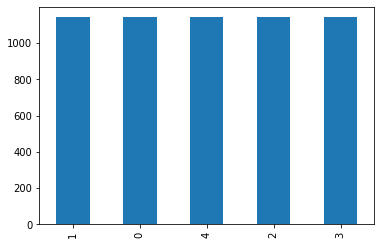

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
seed=2022

df['kfold'] = -1

#層化抽出法を用いることでランダムにfoldしている
N_FOLDS = 5
strat_kfold = StratifiedKFold(n_splits=N_FOLDS, random_state=seed, shuffle=True)
for i, (_, train_index) in enumerate(strat_kfold.split(df.index, df['bins'])):
    df.iloc[train_index, -1] = i
    
df['kfold'] = df['kfold'].astype('int')

df.kfold.value_counts().plot.bar()

In [29]:
df.drop('bins', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df_train = df[df.kfold != 0].reset_index(drop=True)
df_valid = df[df.kfold == 0].reset_index(drop=True)

In [33]:
df_valid

,text,label,kfold
0,"The myth is that the ""gap"" is entirely based o...",-0.022,0
1,"No, the point is they aren't talking about dis...",-0.174,0
2,So women are paid less for the same job?,-0.229,0
3,I don't think they're any different. They are ...,-0.062,0
4,> It's the difference between the WNBA and NBA...,-0.188,0
...,...,...,...
1137,"No, it is not. Verifying employment ability st...",-0.043,0
1138,"Heavy metal also encourges hate, but it doesn'...",-0.064,0
1139,Cross referencing and forming your own ideolog...,-0.542,0
1140,Ok so maaaaybe I got banned for posting a lin...,-0.213,0


In [35]:
df_ruddit_train=pd.DataFrame(columns=['less_toxic', 'more_toxic'])
for i in range(50000):
  if (i%10000)==0:
    print(i)
  df_temp=df_train.sample(2)
  if (df_temp.iloc[0,1]==df_temp.iloc[1,1])==True:
    continue
  elif (df_temp.iloc[0,1]<df_temp.iloc[1,1])==True:
    df_new = df_temp.iloc[0,0], df_temp.iloc[1,0]
  elif (df_temp.iloc[0,1]<df_temp.iloc[1,1])==False:
    df_new = df_temp.iloc[1,0], df_temp.iloc[0,0]
  df_ruddit_train = df_ruddit_train.append(dict(zip(df_ruddit_train.columns, df_new)), ignore_index=True)

0
10000
20000
30000
40000


In [36]:
df_ruddit_valid=pd.DataFrame(columns=['less_toxic', 'more_toxic'])
for i in range(10000):
  if (i%10000)==0:
    print(i)
  df_temp=df_valid.sample(2)
  if (df_temp.iloc[0,1]==df_temp.iloc[1,1])==True:
    continue
  elif (df_temp.iloc[0,1]<df_temp.iloc[1,1])==True:
    df_new = df_temp.iloc[0,0], df_temp.iloc[1,0]
  elif (df_temp.iloc[0,1]<df_temp.iloc[1,1])==False:
    df_new = df_temp.iloc[1,0], df_temp.iloc[0,0]
  df_ruddit_valid = df_ruddit_valid.append(dict(zip(df_ruddit_valid.columns, df_new)), ignore_index=True)

0


In [ ]:
#original
df_ruddit=pd.DataFrame(columns=['less_toxic', 'more_toxic'])
for i in range(200000):
  if (i%10000)==0:
    print(i)
  df_temp=df.sample(2)
  if (df_temp.iloc[0,1]==df_temp.iloc[1,1])==True:
    continue
  elif (df_temp.iloc[0,1]<df_temp.iloc[1,1])==True:
    df_new = df_temp.iloc[0,0], df_temp.iloc[1,0]
  elif (df_temp.iloc[0,1]<df_temp.iloc[1,1])==False:
    df_new = df_temp.iloc[1,0], df_temp.iloc[0,0]
  df_ruddit = df_ruddit.append(dict(zip(df_ruddit.columns, df_new)), ignore_index=True)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [ ]:
df_ruddit

,less_toxic,more_toxic
0,Not really. California came at a point when it...,Note to self: Avoid Westminster if visiting L...
1,And then declining to spend money at the NFL. ...,This lady is stupid as fuck if you research ha...
2,"Wait, so how did you get here then?",America is the land of the free sandwiched bet...
3,None of my friends throw a New Year's eve part...,Dragonflies do not often live indoors and prot...
4,My best ks 6:39\n..gonna go in and start at 9 ...,"Not me, but my best friend. She got pregnant l..."
...,...,...
197550,"Shh not yet, poppa Soros hasn't given us the w...","In Latin America I took a cab, those drivers d..."
197551,The specificity of your view and motivation ar...,Walmart? You'll need to hit up target to get t...
197552,Different sparks for different ranks. Admiral ...,Looks like his name is Yevgeny Prigozhin. The ...
197553,As far as I can tell he just fell asleep in ph...,Are you saying people who pay more and buy tic...


In [ ]:
df_ruddit.to_csv('/content/drive/MyDrive/Colab Notebooks/Jigsaw/validation_data_from_ruddit200000')

In [37]:
df_ruddit_train

,less_toxic,more_toxic
0,"Really it’s not that big an issue, but if ther...",It does if she credibly claims that he did. I’...
1,Why do people think Luffy is seriously hurt he...,Are (some) politicians really so dumb or they ...
2,It's sad to say but I think this is finally th...,"""We believe the terrorists got in through the ..."
3,"Must be a late millennial, at 29 I’ve seen Hol...",I bet the rate of prison rapes varies consider...
4,Laughing! And that freak yeah cuddle at the end!,Who can name the famous black pastor that didn...
...,...,...
49373,Who can name the famous black pastor that didn...,They should kill her anyway/
49374,What's the big deal with people having a probl...,"With the sheer amount of content the site has,..."
49375,Because nothing defeats immune diseases like t...,You're not alone buddy. I'm 34 and feel exactl...
49376,"Little Timmy took a drink,\n\nBut he will drin...","No, but her son's friend was a serial rapist a..."


In [38]:
df_ruddit_valid

,less_toxic,more_toxic
0,Thanks and good luck! You can do it!!,Dragonflies don't make good housemates though.
1,Certain vaccines cause shedding and immunocomp...,"True, but I fear their dissatisfaction with th..."
2,"Such hyped, much delayed -_-",Because it's not true..\nThis is the first tim...
3,BJ issuing mass crash suits in UK!,The judge sentenced the perv to jail. He didn...
4,"This is great, but seriously, how can someone ...",Autism is still not a good thing. Some people ...
...,...,...
9863,I had it in a stew in egypt and it was awesome...,Can we get an F for all of the triggered Anti-...
9864,"If you are a teacher reading this, I highly re...",Do you wanna be a fucking sandwich artist?!?
9865,"Because, believe it or not, r/sneakers isn't r...",Because we should completely trust every sourc...
9866,Identity politics are so cool,"Sorry OP, your thread has been removed per sub..."


In [39]:
df_ruddit_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Jigsaw/rudditの中で精度図るためのファイル/validation_data_from_ruddit_train_fold0')
df_ruddit_valid.to_csv('/content/drive/MyDrive/Colab Notebooks/Jigsaw/rudditの中で精度図るためのファイル/validation_data_from_ruddit_valid_fold0',index=False)